# System pkgs

In [1]:
import sys
import os
import IPython

# Data Wrangling pkgs

In [2]:
import numpy as np
np.set_printoptions(threshold=sys.maxsize) # to display the entire array
import pandas as pd
import glob
import urllib.request
from bs4 import BeautifulSoup

# Data Visualisation pkgs

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# from bokeh.plotting import figure, show
# from bokeh.io import output_notebook
# from IPython.display import Image
# output_notebook()

# Geospatial pkgs

In [4]:
import xarray as xr
import geopandas as gpd
import rasterio
import folium
# from osgeo import osr
# import gdal
# from wktplot import WKTPlot
# from wktplot.plots.osm import OpenStreetMapsPlot #### Import OpenStreetMaps plotting class with bokeh
import fiona
import shapely
from shapely.geometry import shape, box, LineString, MultiPolygon, Polygon, MultiPoint, Point, LinearRing
from shapely import wkt
import contextily as ctx

# Scientific pkgs

In [5]:
import re
import random
import scipy
from tqdm import tqdm
import colormap

# ML pkgs

In [6]:
import sklearn

# NLP pkgs

In [7]:
import nltk
import spacy

# SPARQL

In [8]:
from SPARQLWrapper import SPARQLWrapper, JSON, XML, RDF

# Version Checking

In [9]:
from platform import python_version
print(f"Py version {python_version()}")
print(f"Shapely version {shapely.__version__}")
print(f"Shapely GEOS version {shapely.geos_version_string}")
print(f"Shapely GEOS C API version {shapely.geos_capi_version_string}")

Py version 3.10.16
Shapely version 2.0.6
Shapely GEOS version 3.11.4
Shapely GEOS C API version 3.11.4-CAPI-1.17.4


# Data

### CSV

In [10]:
df = pd.read_csv('./data/mbti_1.csv')
df

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


### Shapefile(.shp)

In [11]:
gdfDist25 = gpd.read_file('./data/Munich_25_Bezirke_Dissolved.shp')
gdfSubDist105 = gpd.read_file('./data/Munich_105_Bezirke.shp')

In [12]:
gdfDist25.head()

,Nr,FIRST_Bezi,FIRST_Nr,geometry
0,1,Altstadt-Lehel,1,"POLYGON ((11.5952 48.1417, 11.595 48.1412, 11...."
1,2,Ludwigsvorstadt-Isarvorstadt,2,"POLYGON ((11.556 48.1408, 11.5593 48.1406, 11...."
2,3,Maxvorstadt,3,"POLYGON ((11.5843 48.1442, 11.5831 48.1414, 11..."
3,4,Schwabing-West,4,"POLYGON ((11.5817 48.1763, 11.5832 48.1694, 11..."
4,5,Au-Haidhausen,5,"POLYGON ((11.5956 48.1405, 11.5959 48.1403, 11..."


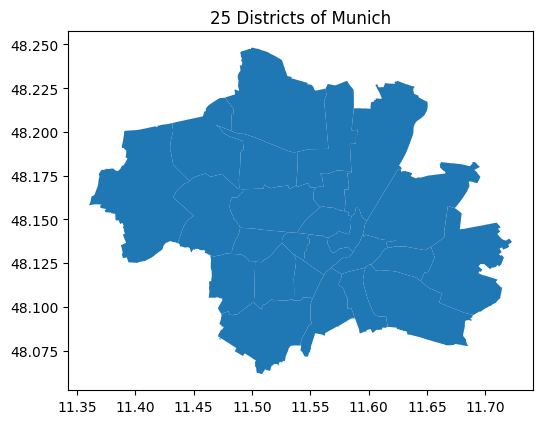

In [13]:
f, ax1 = plt.subplots(figsize=(6, 5))
gdfDist25.plot(ax=ax1)
ax1.set(title="25 Districts of Munich")
plt.show()

Nymphenburg of District Neuhausen-Nymphenburg


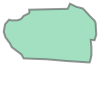

In [14]:
gid = random.randint(0, 24)
print(gdfSubDist105.NAME[gid],'of District', gdfSubDist105.Bezirk[gid])
INPUT = gdfSubDist105.geometry[gid]
INPUT

## Raster Data

### NetCDF (.nc)

In [15]:
### FOR THE FIRST TIME ###

# for yr in range(2011,2015): # note that in python, the end range is not inclusive. So, in this case data for 2015 is not downloaded.
#     url = f'https://downloads.psl.noaa.gov/Datasets/cpc_us_precip/RT/precip.V1.0.{yr}.nc'
#     savename = url.split('/')[-1]
#     urllib.request.urlretrieve(url,savename)

In [16]:
ds2011 = xr.open_dataset('./precip.V1.0.2011.nc')
ds2011

<xarray.Dataset> Size: 53MB
Dimensions:  (lat: 120, lon: 300, time: 365)
Coordinates:
  * lat      (lat) float32 480B 20.12 20.38 20.62 20.88 ... 49.38 49.62 49.88
  * lon      (lon) float32 1kB 230.1 230.4 230.6 230.9 ... 304.4 304.6 304.9
  * time     (time) datetime64[ns] 3kB 2011-01-01 2011-01-02 ... 2011-12-31
Data variables:
    precip   (time, lat, lon) float32 53MB ...
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created RT starting 04/2010 by CAS from data o...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

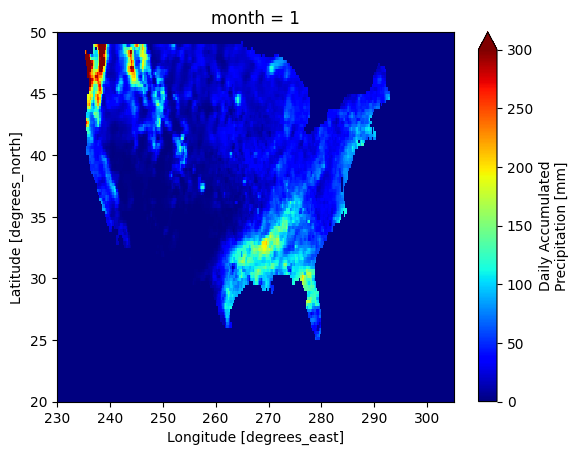

In [17]:
ds2011_mon = ds2011.groupby('time.month').sum()
ds2011_mon.precip[0,:,:].plot(cmap='jet', vmax=300);

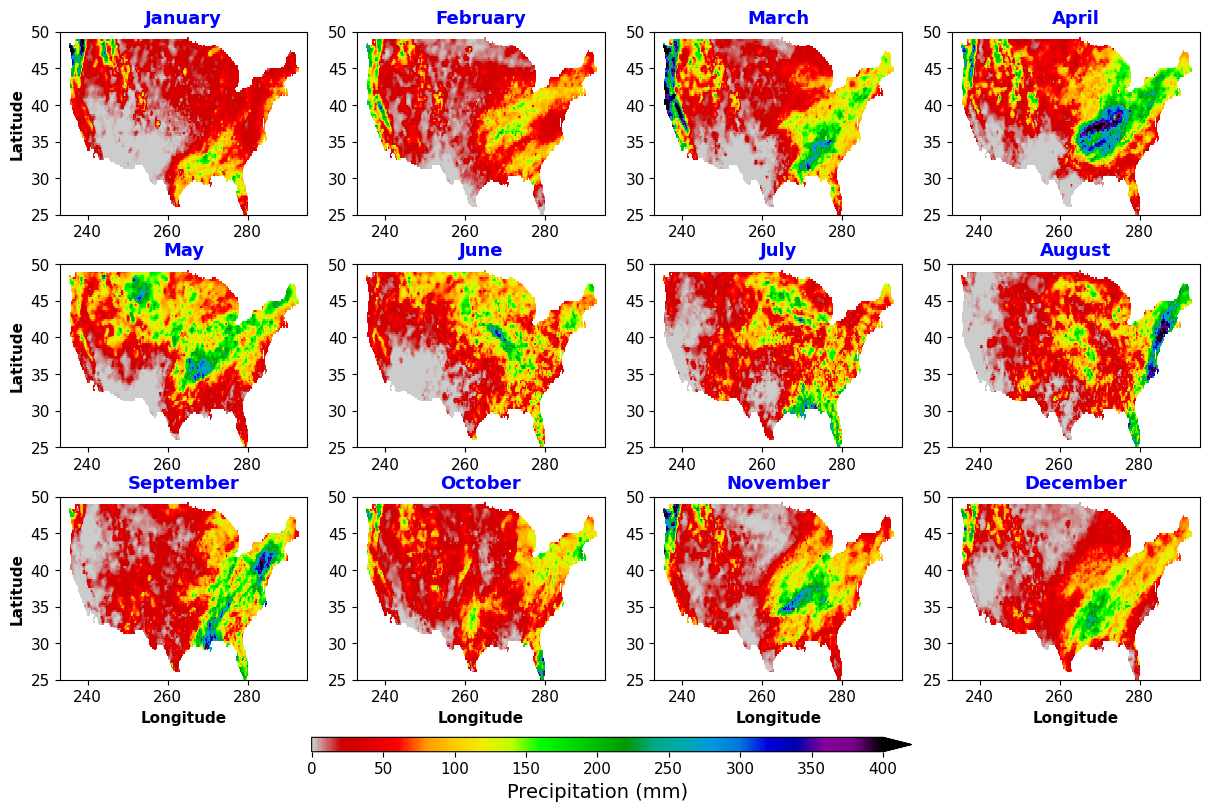

In [18]:
# We'll use this library to easily add month name to subplot titles.
import calendar
# First, We will develop a land mask data array that we can use to mask out the nan values:
landmask = ds2011.precip.sum(dim='time')>0
fig = plt.figure(figsize=[12,8], facecolor='w')
plt.subplots_adjust(bottom=0.15, top=0.96, left=0.04, right=0.99, 
                    wspace=0.2, hspace=0.27) # wspace and hspace adjust the horizontal and vertical spaces, respectively.
nrows = 3
ncols = 4
for i in range(1, 13):
    plt.subplot(nrows, ncols, i)
    dataplot = ds2011_mon.precip[i-1, :, :].where(landmask) # Remember that in Python, the data index starts at 0, but the subplot index start at 1.
    p = plt.pcolormesh(ds2011_mon.lon, ds2011_mon.lat, dataplot,
                   vmax = 400, vmin = 0, cmap = 'nipy_spectral_r',
                   ) 
    plt.xlim([233,295])
    plt.ylim([25,50])
    plt.title(calendar.month_name[dataplot.month.values], fontsize = 13, 
              fontweight = 'bold', color = 'b')
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 11)
    if i % ncols == 1: # Add ylabel for the very left subplots
        plt.ylabel('Latitude', fontsize = 11, fontweight = 'bold')
    if i > ncols*(nrows-1): # Add xlabel for the bottom row subplots
        plt.xlabel('Longitude', fontsize = 11, fontweight = 'bold')

# Add a colorbar at the bottom:
cax = fig.add_axes([0.25, 0.06, 0.5, 0.018])
cb = plt.colorbar(cax=cax, orientation='horizontal', extend = 'max',)
cb.ax.tick_params(labelsize=11)
cb.set_label(label='Precipitation (mm)', color = 'k', size=14)

# Now we can save a high resolution (300dpi) version of the figure:
# plt.savefig('Fig_prec_cpc_mon_2012.png', format = 'png', dpi = 300)

### GeoTIFF

### RasDaMan

In [19]:
# # Rasdaman
# from rasdapy.db_connector import DBConnector
# from rasdapy.query_executor import QueryExecutor

# db_connector = DBConnector("localhost", 7001, "rasadmin", "rasadmin")
# query_executor = QueryExecutor(db_connector)
# db_connector.open() # connection open

# if db_connector is not None:
#     print("RasDaMan is running") 
    
# def restart_rasdaman():
#     from rasdapy.db_connector import DBConnector
#     from rasdapy.query_executor import QueryExecutor

#     db_connector = DBConnector("localhost", 7001, "rasadmin", "rasadmin")
#     query_executor = QueryExecutor(db_connector)
#     db_connector.open() # connection open

## DBPedia KG

In [20]:
sparqlEndpoint = SPARQLWrapper("http://dbpedia.org/sparql") #determine SPARQL endpoint
sparqlEndpoint.setReturnFormat(JSON) #determine the output format

In [21]:
#SPARQL query to be executed
sparqlEndpoint.setQuery("""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbc: <http://dbpedia.org/resource/Category:>
PREFIX dct: <http://purl.org/dc/terms/>

SELECT DISTINCT ?date ?author ?authorName ?thumbnail ?description
WHERE {
?author rdf:type dbo:Writer ;
              dct:subject dbc:Nobel_laureates_in_Literature ;
        rdfs:label ?authorName ;
        dbo:wikiPageWikiLink ?link ;
        rdfs:comment ?description
 FILTER ((lang(?authorName)="en")&&(lang(?description)="en")) .

?link dct:subject dbc:Nobel_Prize_in_Literature ;
         dbp:holderLabel ?date .
 OPTIONAL { ?author dbo:thumbnail ?thumbnail . }
}

ORDER BY ?date
""")

In [22]:
sparqlEndpoint.setReturnFormat(JSON)   # Return format is JSON
results = sparqlEndpoint.query().convert()   # execute SPARQL query and write result to "results"
results

{'head': {'link': [],
  'vars': ['date', 'author', 'authorName', 'thumbnail', 'description']},
 'results': {'distinct': False,
  'ordered': True,
  'bindings': [{'date': {'type': 'literal',
     'xml:lang': 'en',
     'value': 'Currently held by'},
    'author': {'type': 'uri',
     'value': 'http://dbpedia.org/resource/Camilo_José_Cela'},
    'authorName': {'type': 'literal',
     'xml:lang': 'en',
     'value': 'Camilo José Cela'},
    'thumbnail': {'type': 'uri',
     'value': 'http://commons.wikimedia.org/wiki/Special:FilePath/Camilo_José_Cela._Fototeca._Biblioteca_Virtual_del_Patrimonio_Bibliográfico.jpg?width=300'},
    'description': {'type': 'literal',
     'xml:lang': 'en',
     'value': 'Camilo José Cela y Trulock, 1st Marquess of Iria Flavia (Spanish: [kamilo xoˈse ˈθela]; 11 May 1916 – 17 January 2002) was a Spanish novelist, poet, story writer and essayist associated with the Generation of \'36 movement. He was awarded the 1989 Nobel Prize in Literature "for a rich and int

In [23]:
results_df = pd.json_normalize(results['results']['bindings'])
results_df.head()

,date.type,date.xml:lang,date.value,author.type,author.value,authorName.type,authorName.xml:lang,authorName.value,thumbnail.type,thumbnail.value,description.type,description.xml:lang,description.value
0,literal,en,Currently held by,uri,http://dbpedia.org/resource/Camilo_José_Cela,literal,en,Camilo José Cela,uri,http://commons.wikimedia.org/wiki/Special:File...,literal,en,"Camilo José Cela y Trulock, 1st Marquess of Ir..."
1,literal,en,Currently held by,uri,http://dbpedia.org/resource/Carl_Spitteler,literal,en,Carl Spitteler,uri,http://commons.wikimedia.org/wiki/Special:File...,literal,en,Carl Friedrich Georg Spitteler (24 April 1845 ...
2,literal,en,Currently held by,uri,http://dbpedia.org/resource/Pär_Lagerkvist,literal,en,Pär Lagerkvist,uri,http://commons.wikimedia.org/wiki/Special:File...,literal,en,Pär Fabian Lagerkvist (23 May 1891 – 11 July 1...
3,literal,en,Currently held by,uri,http://dbpedia.org/resource/Roger_Martin_du_Gard,literal,en,Roger Martin du Gard,uri,http://commons.wikimedia.org/wiki/Special:File...,literal,en,Roger Martin du Gard (French: [dy gaʁ]; 23 Mar...
4,literal,en,Currently held by,uri,http://dbpedia.org/resource/Romain_Rolland,literal,en,Romain Rolland,uri,http://commons.wikimedia.org/wiki/Special:File...,literal,en,Romain Rolland (French: [ʁɔlɑ̃]; 29 January 18...


In [24]:
results_df.shape

(102, 13)

In [25]:
results_df[['date.value', 'author.value', 'authorName.value', 'thumbnail.value', 'description.value']].head()

,date.value,author.value,authorName.value,thumbnail.value,description.value
0,Currently held by,http://dbpedia.org/resource/Camilo_José_Cela,Camilo José Cela,http://commons.wikimedia.org/wiki/Special:File...,"Camilo José Cela y Trulock, 1st Marquess of Ir..."
1,Currently held by,http://dbpedia.org/resource/Carl_Spitteler,Carl Spitteler,http://commons.wikimedia.org/wiki/Special:File...,Carl Friedrich Georg Spitteler (24 April 1845 ...
2,Currently held by,http://dbpedia.org/resource/Pär_Lagerkvist,Pär Lagerkvist,http://commons.wikimedia.org/wiki/Special:File...,Pär Fabian Lagerkvist (23 May 1891 – 11 July 1...
3,Currently held by,http://dbpedia.org/resource/Roger_Martin_du_Gard,Roger Martin du Gard,http://commons.wikimedia.org/wiki/Special:File...,Roger Martin du Gard (French: [dy gaʁ]; 23 Mar...
4,Currently held by,http://dbpedia.org/resource/Romain_Rolland,Romain Rolland,http://commons.wikimedia.org/wiki/Special:File...,Romain Rolland (French: [ʁɔlɑ̃]; 29 January 18...


## Colormap

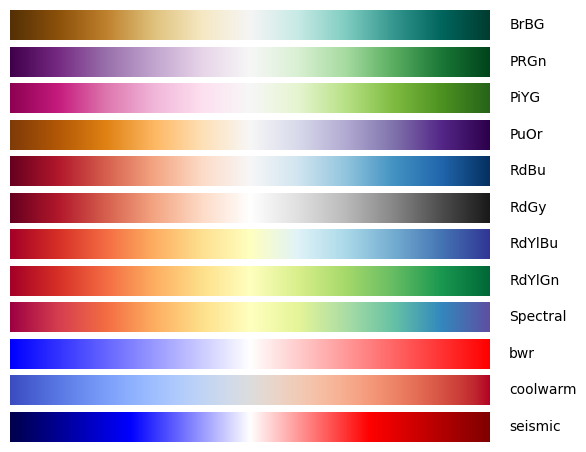

In [26]:
c = colormap.Colormap()
c.plot_colormap('diverging')

In [27]:
for i in tqdm(range(10000000)):
    ...

print("ALL IS WELL")

100%|██████████| 10000000/10000000 [00:03<00:00, 3066807.77it/s]

ALL IS WELL


# Exploratory Data Analysis (EDA)